
                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━╸━   0.0 B /  ??.?MB @ 

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:49: FutureWarning:

The default value of regex will change from True to False in a future version.



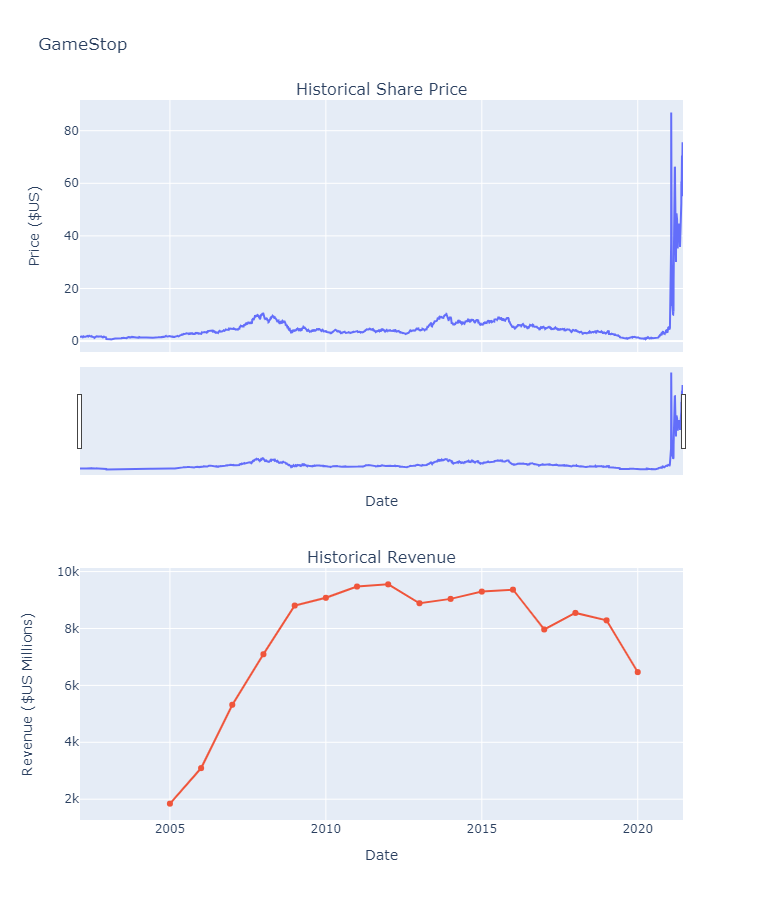

This is the HEAD for TESLA
        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
This is the HEAD for revenue
   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759
This is the TAIL END for revenue
    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:75: FutureWarning:

The default value of regex will change from True to False in a future version.



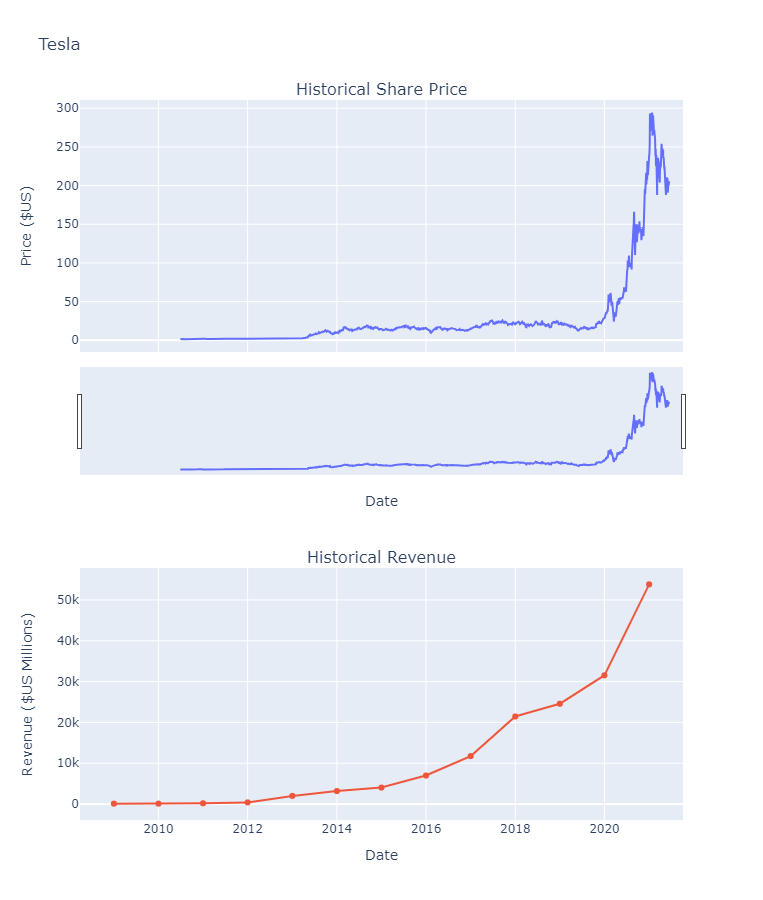

In [5]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install nbformat==4.2.0
!pip install lxml==4.6.4
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()


game = yf.Ticker('GME')
gme_data = game.history(period="max")
gme_data.reset_index(inplace=True)
print("This is the HEAD for Game Stop")
print(gme_data.head())
html_data = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data = requests.get(html_data).text
soup = BeautifulSoup(data, 'lxml')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# soup1 = soup.find("tbody")[1]
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    # Finally we append the data of each row to the table
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)    
print("This is the HEAD for revenue")
print(gme_revenue.head())
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
print("This is the TAIL END for revenue")
print(gme_revenue.tail())
make_graph(gme_data, gme_revenue, 'GameStop')


game = yf.Ticker('TSLA')
tesla_data = game.history(period="max")
tesla_data.reset_index(inplace=True)
print("This is the HEAD for TESLA")
print(tesla_data.head())
html_data = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(html_data).text
soup = BeautifulSoup(data, 'lxml')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# soup1 = soup.find("tbody")[1]
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    # Finally we append the data of each row to the table
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)    
print("This is the HEAD for revenue")
print(tesla_revenue.head())
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print("This is the TAIL END for revenue")
print(tesla_revenue.tail())
make_graph(tesla_data, tesla_revenue, 'Tesla')